In [114]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Courses\ML Dr Mostafa\slides\02 Libraries\6-homework\USvideos.csv")
pd.set_option("display.max_columns",50)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
df["category_id"]=df["category_id"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int32 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
df2=pd.read_json(r"D:\Courses\ML Dr Mostafa\slides\02 Libraries\6-homework\US_category_id.json")
pd.set_option("display.max_columns",50)

df2["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [5]:
xx={}
for ca in df2["items"]:
    xx[int(ca['id'])] = ca['snippet']['title']
df['category_name'] = df['category_id'].map(xx)
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


In [6]:
df["category_name"].nunique()

16

In [7]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

In [8]:
df.shape

(40949, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int32 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


In [11]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name               0
dtype: int64

In [12]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN,Sports
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN,Sports
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN,Science & Technology


In [13]:
df.duplicated().sum()

48

In [14]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...,Entertainment
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...,Entertainment
34902,MAjY8mCTXWk,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,1042,4746,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...,Music
34903,xhs8tf1v__w,18.15.05,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,2018-05-14T16:00:29.000Z,"autocomplete|""deadpool 2""|""google autocomplete...",343967,16988,132,1308,https://i.ytimg.com/vi/xhs8tf1v__w/default.jpg,False,False,False,Terry Crews takes the WIRED Autocomplete Inter...,Entertainment
34904,E21NATEP9QI,18.15.05,Why Stradivarius violins are worth millions,Vox,25,2018-05-14T12:00:03.000Z,"vox.com|""vox""|""explain""|""stradivarius""|""violin...",433833,12356,307,1129,https://i.ytimg.com/vi/E21NATEP9QI/default.jpg,False,False,False,Many musicians prefer these 300-year-old instr...,News & Politics
34905,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...,People & Blogs
34906,1RZYOeQeIXE,18.15.05,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,2018-05-14T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...,Entertainment
34907,WF82ABLw8s4,18.15.05,Gabby Barrett Sings I Have Nothing by Whitney ...,American Idol,24,2018-05-14T02:23:01.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",735031,11734,1468,1870,https://i.ytimg.com/vi/WF82ABLw8s4/default.jpg,False,False,False,Gabby Barrett sings I Have Nothing by Whitney ...,Entertainment
34908,r-3iathMo7o,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,8028,13293,https://i.ytimg.com/vi/r-3iathMo7o/default.jpg,False,False,False,"Fortnite, PUBG, Far Cry 5? Which game would yo...",Science & Technology


In [15]:
z=df["video_id"]=="QBL8IRJ5yHU"
df[z]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
34750,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
34952,QBL8IRJ5yHU,18.16.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",2806454,264364,9214,45967,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
35168,QBL8IRJ5yHU,18.17.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3169706,280422,11291,48789,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
35385,QBL8IRJ5yHU,18.18.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3305195,286754,11974,49938,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
35589,QBL8IRJ5yHU,18.19.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3388949,290270,12379,50410,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
35792,QBL8IRJ5yHU,18.20.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3457778,293022,12717,50904,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
36028,QBL8IRJ5yHU,18.21.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3519164,295306,12900,51215,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
36237,QBL8IRJ5yHU,18.22.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3575061,297520,13066,51547,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
36445,QBL8IRJ5yHU,18.23.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",3613618,298978,13205,51753,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
category_name               0
dtype: int64

In [19]:
df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
category_name                16
dtype: int64

In [20]:
df.shape

(40901, 17)

In [21]:
df["publish_time"]=pd.to_datetime(df["publish_time"])
df["publish_hour"]=df["publish_time"].dt.time
df["publish_date"]=df["publish_time"].dt.date
df.drop(columns=["publish_time"],inplace=True)
df

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,07:30:00,2017-11-13
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,19:05:24,2017-11-12
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,11:00:04,2017-11-13
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,18:01:41,2017-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,13:00:04,2018-05-18
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,01:00:06,2018-05-18
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,17:34:22,2018-05-18
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,17:00:04,2018-05-17


In [22]:
df["trending_date"]=pd.to_datetime(df["trending_date"],format="%y.%d.%m")
#df["publish_date"]=pd.to_datetime(df["publish_date"])
df

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,07:30:00,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,19:05:24,2017-11-12
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,11:00:04,2017-11-13
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,18:01:41,2017-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,13:00:04,2018-05-18
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,01:00:06,2018-05-18
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,17:34:22,2018-05-18
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,17:00:04,2018-05-17


In [23]:
df["trending_date"].max()-df["trending_date"].min()

Timedelta('212 days 00:00:00')

In [24]:
df["publish_date"]=pd.to_datetime(df["publish_date"])
df["days_to_trend"]=df["trending_date"]-df["publish_date"]
df.sort_values(by="days_to_trend")

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend
7028,KMTJrFPie6w,2017-12-19,"Jimmy Fallon, Anna Kendrick, Darlene Love & Th...",The Tonight Show Starring Jimmy Fallon,23,"jimmy fallon|""anna kendrick""|""classroom instru...",24032,1739,22,45,https://i.ytimg.com/vi/KMTJrFPie6w/default.jpg,False,False,False,Anna Kendrick joins Jimmy and The Roots in the...,Comedy,04:54:00,2017-12-19,0 days
40751,8O-ZUXGcuWU,2018-06-14,Nintendo @ E3 2018: Day 2,Nintendo,20,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",1549110,21905,1516,1318,https://i.ytimg.com/vi/8O-ZUXGcuWU/default.jpg,False,False,False,ESRB Rating: RATING PENDING to TEEN. Rating Pe...,Gaming,01:31:53,2018-06-14,0 days
13423,dPuULksBPcI,2018-01-22,Sean “Diddy” Combs On Janet Jackson And Justin...,Watch What Happens Live with Andy Cohen,24,"What What Happens live|""reality""|""interview""|""...",2055,90,4,26,https://i.ytimg.com/vi/dPuULksBPcI/default.jpg,False,False,False,"During a round of Spill the Indus-Tea, mogul S...",Entertainment,04:45:01,2018-01-22,0 days
14816,S_HixQBiVH0,2018-01-29,"John Legend And Tony Bennett Sing 'New York, N...",CBS,24,"grammy|""grammys""|""grammy awards""|""grammy award...",798,45,4,6,https://i.ytimg.com/vi/S_HixQBiVH0/default.jpg,False,False,False,The duo does an impromptu duet before announci...,Entertainment,02:33:04,2018-01-29,0 days
13003,eV03W0mnxkI,2018-01-20,Atlas V SBIRS GEO Flight 4 Broadcast (Jan. 19),United Launch Alliance,28,"United Launch Alliance|""ULA""|""Rockets""|""Rocket...",102361,785,70,49,https://i.ytimg.com/vi/eV03W0mnxkI/default.jpg,False,False,False,Watch as ULA's Atlas V rocket launches the Spa...,Science & Technology,01:39:37,2018-01-20,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,UQtt9I6c-YM,2018-01-06,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",49942,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,18:22:40,2008-04-05,3563 days
10921,UQtt9I6c-YM,2018-01-07,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50030,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,18:22:40,2008-04-05,3564 days
11150,UQtt9I6c-YM,2018-01-08,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50117,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,18:22:40,2008-04-05,3565 days
11375,UQtt9I6c-YM,2018-01-09,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,Film & Animation,18:22:40,2008-04-05,3566 days


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40901 non-null  object         
 1   trending_date           40901 non-null  datetime64[ns] 
 2   title                   40901 non-null  object         
 3   channel_title           40901 non-null  object         
 4   category_id             40901 non-null  int32          
 5   tags                    40901 non-null  object         
 6   views                   40901 non-null  int64          
 7   likes                   40901 non-null  int64          
 8   dislikes                40901 non-null  int64          
 9   comment_count           40901 non-null  int64          
 10  thumbnail_link          40901 non-null  object         
 11  comments_disabled       40901 non-null  bool           
 12  ratings_disabled        40901 no

In [26]:
df["day"]=df["publish_date"].dt.day_name()
df.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13,1 days,Monday
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,07:30:00,2017-11-13,1 days,Monday


In [27]:
df["react%"]=(df["likes"]+df["dislikes"])/df["views"]*100
df["react%"]=df["react%"].round(2)
df.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13,1 days,Monday,8.08


#                                         category

In [28]:
df["category_name"].value_counts()

Entertainment            9944
Music                    6467
Howto & Style            4142
Comedy                   3453
People & Blogs           3208
News & Politics          2485
Science & Technology     2397
Film & Animation         2343
Sports                   2172
Education                1655
Pets & Animals            920
Gaming                    816
Travel & Events           401
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

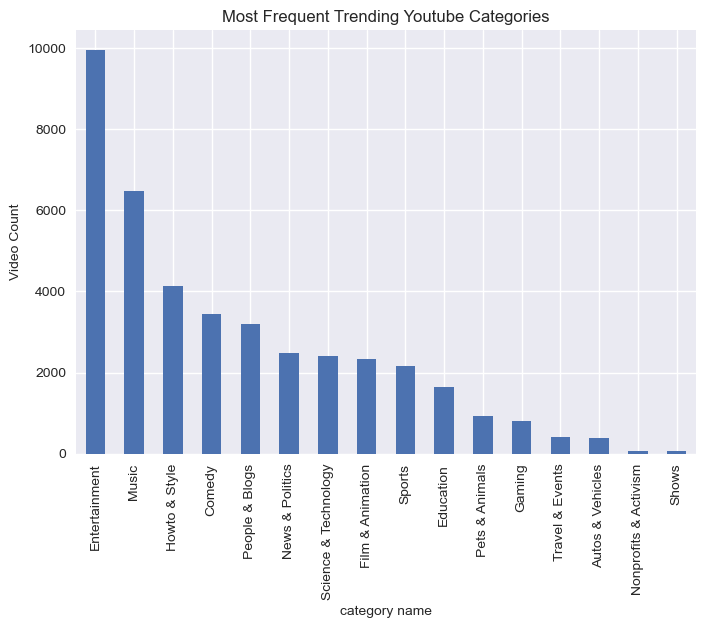

In [29]:
df["category_name"].value_counts().plot(kind="bar")
plt.xlabel("category name")
plt.ylabel("Video Count")
plt.title("Most Frequent Trending Youtube Categories")

plt.show()

In [30]:
top_ca_v=df.groupby(["category_name"])[["trending_date","views","likes","dislikes","comment_count"]].sum().nlargest(16,"views")
top_ca_v

,views,likes,dislikes,comment_count
category_name,,,,
Music,40126286541,1416572741,51173364,125275820
Entertainment,20561101882,529233220,42904603,73448375
Film & Animation,7267792432,165604731,6071246,17877359
Comedy,5111266590,216136310,7219986,22496604
People & Blogs,4910004664,186350335,10178864,24759019
Sports,4403213872,98614929,5132721,11189359
Howto & Style,4071011870,162515891,5462302,23095757
Science & Technology,3473462753,82255009,4531899,11954553
Gaming,2127799781,68779564,9161661,14720836


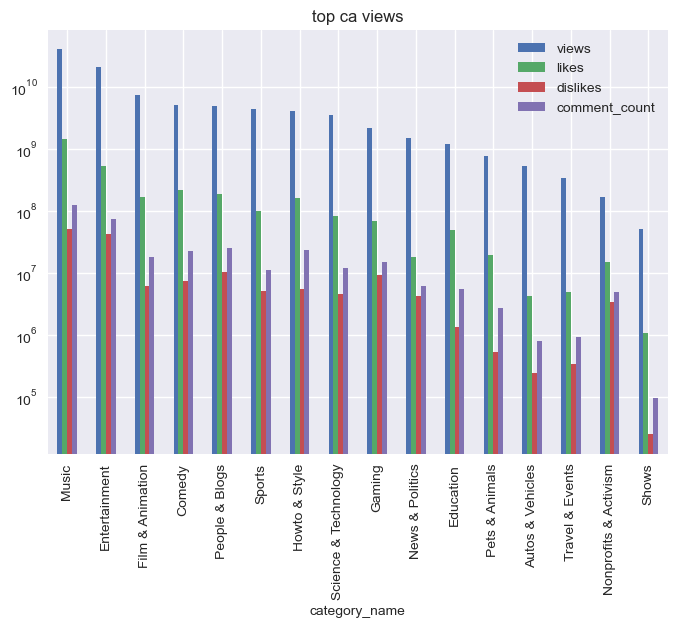

In [31]:
top_ca_v.plot(kind="bar")
plt.title("top ca views")
plt.yscale("log")
plt.show()

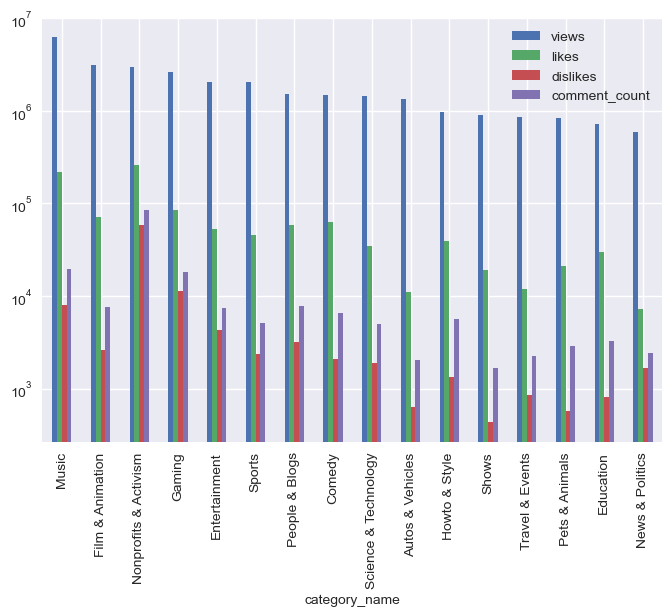

In [32]:
top_ca_v1=df.groupby(["category_name"])[["trending_date","views","likes","dislikes","comment_count"]].mean().nlargest(16,"views")
top_ca_v1.plot(kind="bar")
plt.yscale("log")
plt.show()

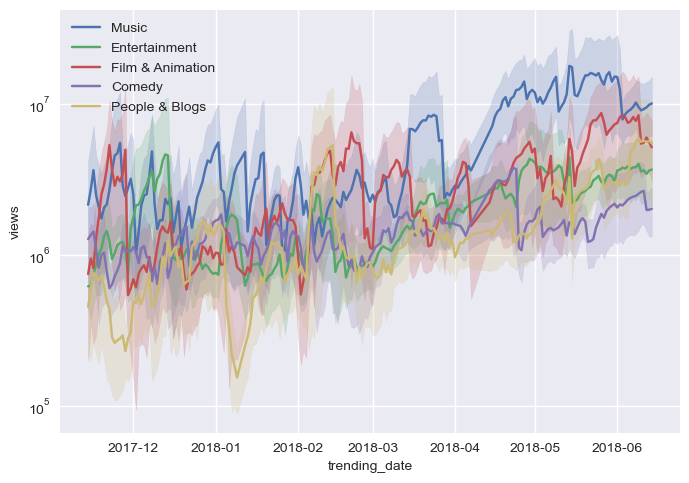

In [33]:
for i in top_ca_v.index[0:5]:
    x=df[df["category_name"]==i]
    sns.lineplot(x=x["trending_date"],y=x["views"],label=i)
plt.legend()
plt.xlabel("trending_date")
plt.yscale("log")
plt.show()

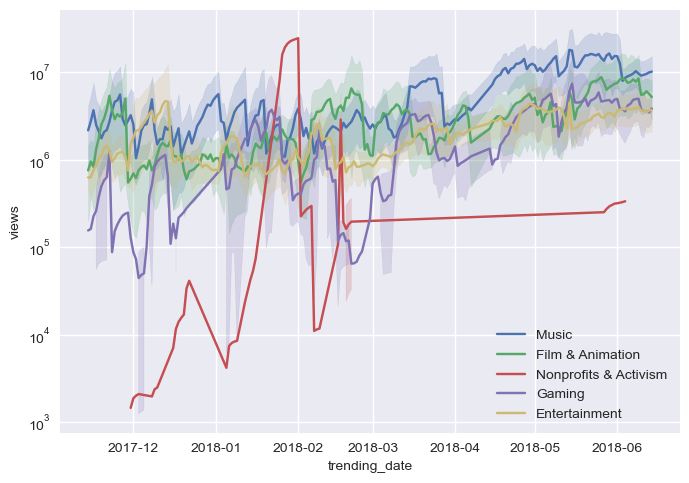

In [34]:
for i in top_ca_v1.index[0:5]:
    x=df[df["category_name"]==i]
    sns.lineplot(x=x["trending_date"],y=x["views"],label=i)
plt.legend()
plt.xlabel("trending_date")
plt.yscale("log")
plt.show()


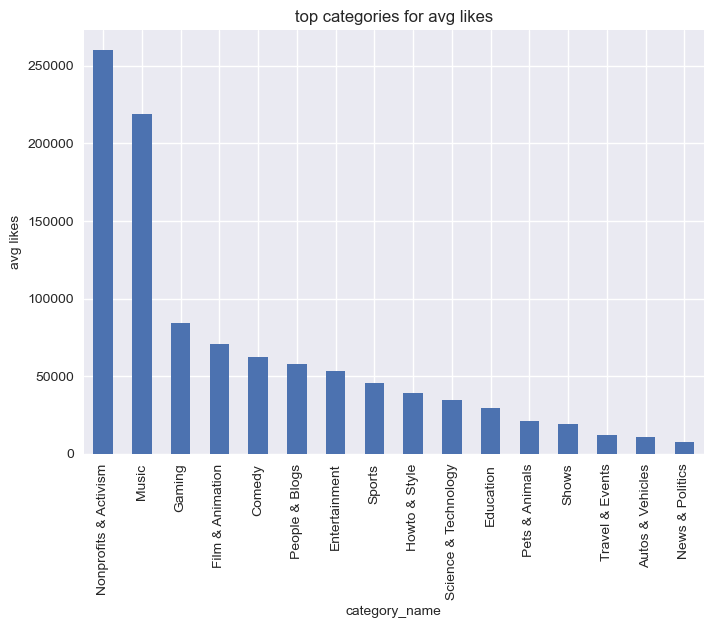

In [35]:
df.groupby(["category_name"]).mean()["likes"].nlargest(20).plot(kind="bar")
plt.xlabel("category_name")
plt.ylabel("avg likes")
plt.title("top categories for avg likes")
plt.show()

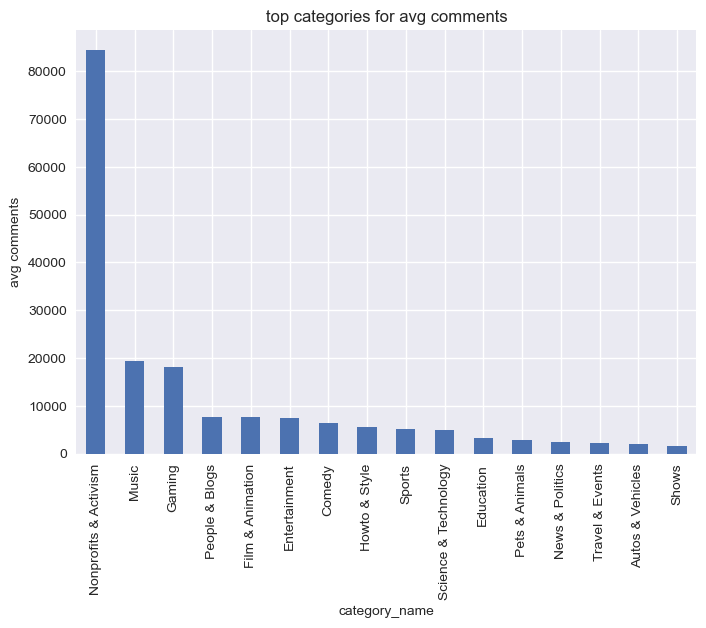

In [36]:
df.groupby(["category_name"]).mean()["comment_count"].nlargest(20).plot(kind="bar")
plt.xlabel("category_name")
plt.ylabel("avg comments")
plt.title("top categories for avg comments")
plt.show()

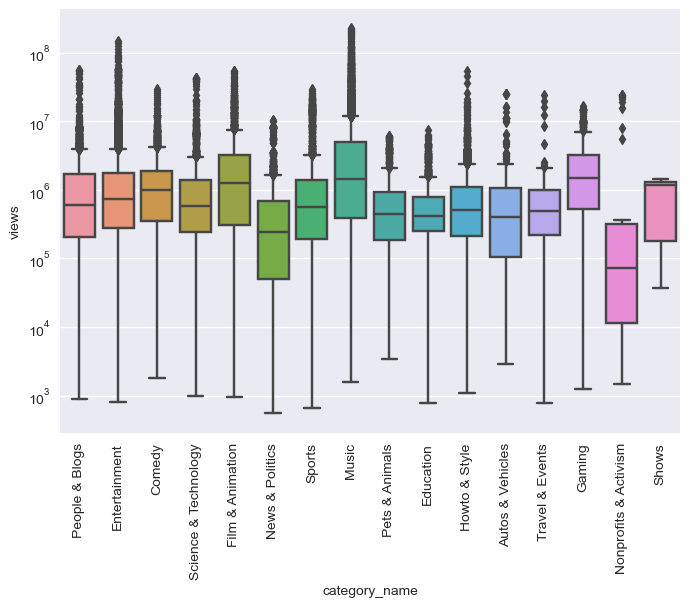

In [37]:
sns.boxplot(x=df["category_name"],y=df["views"])
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

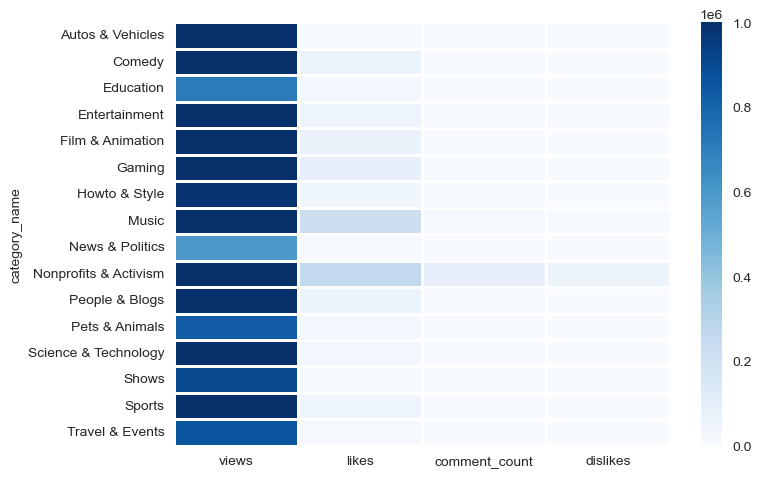

In [38]:
q=df.groupby(["category_name"])[["views","likes","comment_count","dislikes"]].mean()
sns.heatmap(data=q,cmap="Blues",linewidths=.9,vmin=0,vmax=1000000)
plt.show()

In [39]:
filt=df[df["category_name"]=="Music"]

In [40]:
filt[["trending_date","views","likes","dislikes","comment_count"]]

,trending_date,views,likes,dislikes,comment_count
12,2017-11-14,687582,114188,1333,8371
32,2017-11-14,17158531,787419,43420,125882
37,2017-11-14,13917,1318,24,76
39,2017-11-14,57169,6927,161,565
40,2017-11-14,60506,5389,106,455
...,...,...,...,...,...
40935,2018-06-14,4945185,189265,9406,18683
40938,2018-06-14,41803845,628861,42833,39363
40939,2018-06-14,6004782,210802,4166,15169
40941,2018-06-14,5534278,45128,1591,806


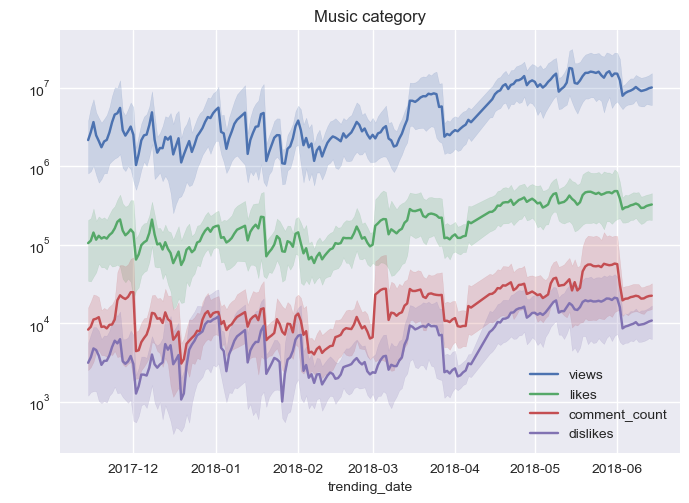

In [41]:
sns.lineplot(x=filt["trending_date"],y=filt["views"],label="views")
sns.lineplot(x=filt["trending_date"],y=filt["likes"],label="likes")
sns.lineplot(x=filt["trending_date"],y=filt["comment_count"],label="comment_count")
sns.lineplot(x=filt["trending_date"],y=filt["dislikes"],label="dislikes")

plt.legend()
plt.ylabel(" ")
plt.title("Music category")
plt.yscale("log")
plt.show()

In [42]:
# sns.lineplot(x=df["trending_date"],y=df["views"],label="1")
# sns.lineplot(x=df["trending_date"],y=df["likes"])
# sns.lineplot(x=df["trending_date"],y=df["dislikes"])
# sns.lineplot(x=df["trending_date"],y=df["comment_count"])


# channel

In [43]:
top_cha=df.groupby(["channel_title"])[["trending_date","views","likes","dislikes","comment_count"]].sum().nlargest(10,"views")
top_cha

,views,likes,dislikes,comment_count
channel_title,,,,
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
ibighit,2235906679,199247121,3467306,31817464
Dude Perfect,1870085178,60275557,1501477,4009163
Marvel Entertainment,1808998971,55873344,1031250,6453560
ArianaGrandeVevo,1576959172,52170970,1931230,4295333
MalumaVEVO,1551515831,23278380,1757948,1227634
jypentertainment,1486972132,44900910,2482131,7575510
Sony Pictures Entertainment,1432374398,30106808,1414686,3533551
FoxStarHindi,1238609854,23762509,910745,1782776


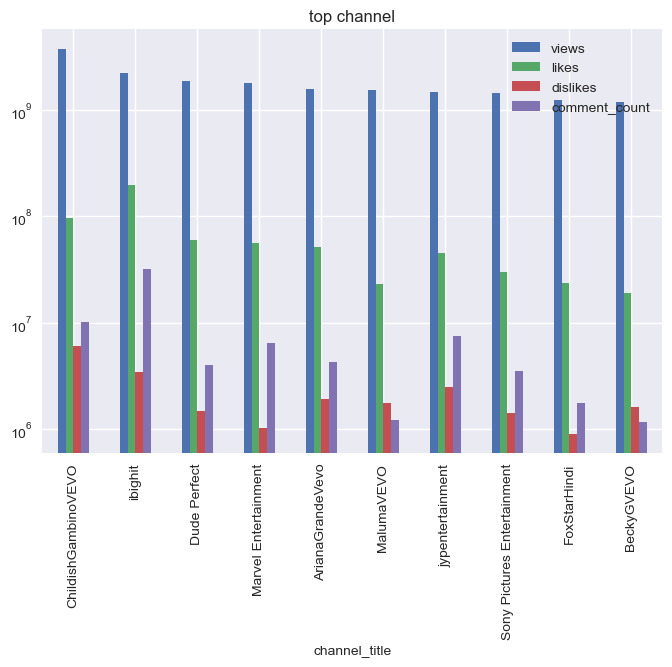

In [44]:
top_cha.plot(kind="bar")
plt.xlabel("channel_title")
plt.title("top channel")
plt.yscale("log")
plt.show()

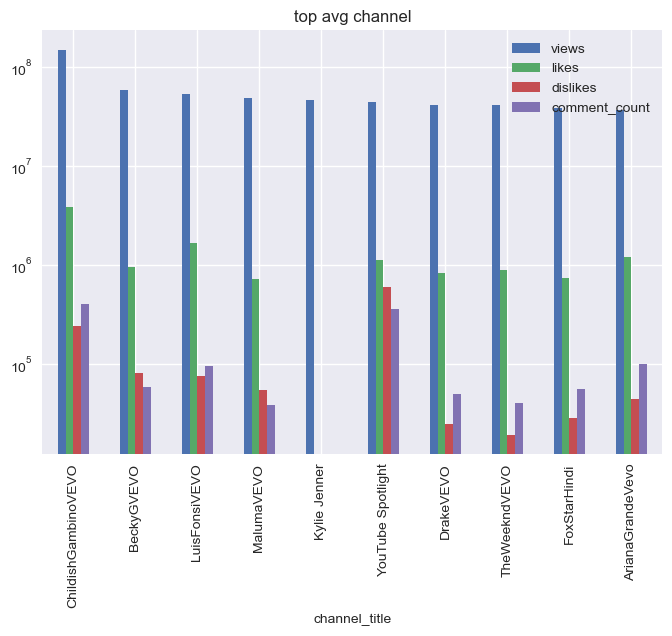

In [45]:
df.groupby(["channel_title"])[["trending_date","views","likes","dislikes","comment_count"]].mean().nlargest(10,"views").plot(kind="bar")
plt.xlabel("channel_title")
plt.title("top avg channel")
plt.yscale("log")
plt.show()

In [46]:
top_cl=df.groupby(["channel_title"])[["views","likes","dislikes","comment_count"]].sum().nlargest(10,"likes")
top_cl

,views,likes,dislikes,comment_count
channel_title,,,,
ibighit,2235906679,199247121,3467306,31817464
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
Dude Perfect,1870085178,60275557,1501477,4009163
Marvel Entertainment,1808998971,55873344,1031250,6453560
ArianaGrandeVevo,1576959172,52170970,1931230,4295333
jypentertainment,1486972132,44900910,2482131,7575510
TaylorSwiftVEVO,1010955662,39292840,2127542,3352611
Ed Sheeran,1032288961,39279211,769501,1950501
ZaynVEVO,838561451,31695245,777336,2144996


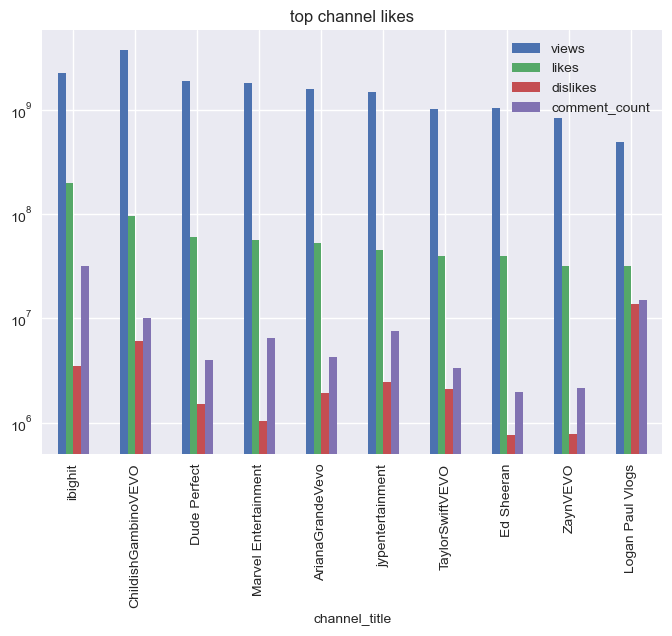

In [47]:
top_cl.plot(kind="bar")
plt.xlabel("channel_title")
plt.title("top channel likes")
plt.yscale("log")
plt.show()

In [48]:
top_cha.index==top_cl.index

array([False, False,  True,  True,  True, False, False, False, False,
       False])

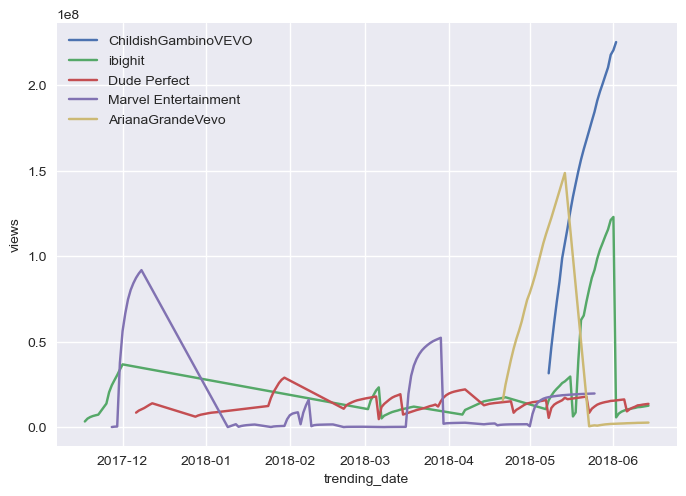

In [49]:
for i in top_cha.index[0:5]:
    x=df[df["channel_title"]==i]
    sns.lineplot(x=x["trending_date"],y=x["views"],label=i)
plt.legend()
plt.xlabel("trending_date")
#plt.yscale("log")
plt.show()

In [50]:
df[df["channel_title"]=="ChildishGambinoVEVO"].sort_values(by="trending_date")

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%
33351,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,2 days,Sunday,4.60
33557,VYOjWnS4cMY,2018-05-09,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841540,79717,194822,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,3 days,Sunday,4.07
33772,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377,232723,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,4 days,Sunday,3.76
33983,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478904,124290,263984,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,5 days,Sunday,3.55
34202,VYOjWnS4cMY,2018-05-12,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,289682,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,6 days,Sunday,3.38
34420,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,7 days,Sunday,3.23
34850,VYOjWnS4cMY,2018-05-15,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",116581406,3388289,186591,354187,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,9 days,Sunday,3.07
35057,VYOjWnS4cMY,2018-05-16,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,10 days,Sunday,3.01
35265,VYOjWnS4cMY,2018-05-17,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,11 days,Sunday,2.95
35474,VYOjWnS4cMY,2018-05-18,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,12 days,Sunday,2.90


In [51]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13,1 days,Monday,8.08
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,07:30:00,2017-11-13,1 days,Monday,4.27


In [52]:
df["channel_title"].nunique()

2207

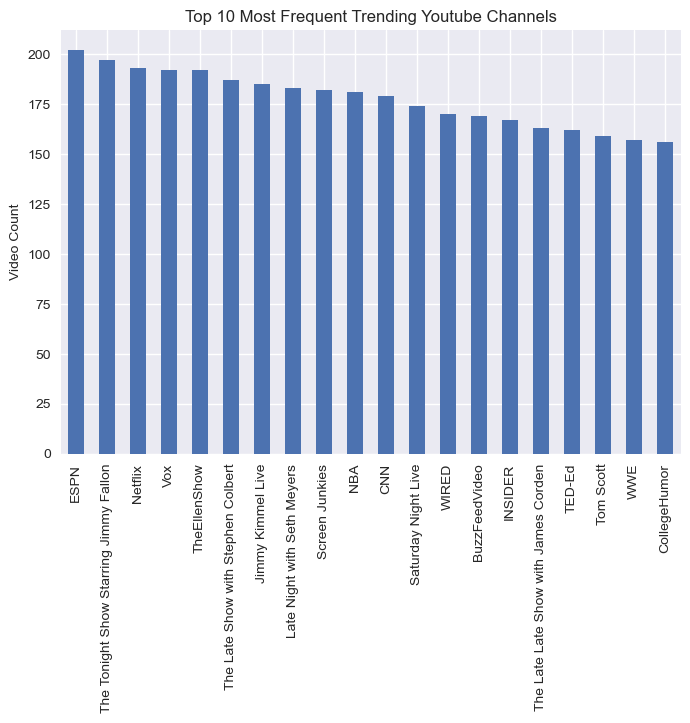

In [53]:
df["channel_title"].value_counts().nlargest(20).plot(kind="bar")
plt.title("Top 10 Most Frequent Trending Youtube Channels")
plt.ylabel("Video Count")
plt.show()

# video title

In [54]:
df[["title","views"]].nlargest(20,"views")

,title,views
38547,Childish Gambino - This Is America (Official V...,225211923
38345,Childish Gambino - This Is America (Official V...,220490543
38146,Childish Gambino - This Is America (Official V...,217750076
37935,Childish Gambino - This Is America (Official V...,210338856
37730,Childish Gambino - This Is America (Official V...,205643016
37531,Childish Gambino - This Is America (Official V...,200820941
37333,Childish Gambino - This Is America (Official V...,196222618
37123,Childish Gambino - This Is America (Official V...,190950401
36913,Childish Gambino - This Is America (Official V...,184446490
36710,Childish Gambino - This Is America (Official V...,179045286


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                40901 non-null  object         
 1   trending_date           40901 non-null  datetime64[ns] 
 2   title                   40901 non-null  object         
 3   channel_title           40901 non-null  object         
 4   category_id             40901 non-null  int32          
 5   tags                    40901 non-null  object         
 6   views                   40901 non-null  int64          
 7   likes                   40901 non-null  int64          
 8   dislikes                40901 non-null  int64          
 9   comment_count           40901 non-null  int64          
 10  thumbnail_link          40901 non-null  object         
 11  comments_disabled       40901 non-null  bool           
 12  ratings_disabled        40901 no

In [56]:
top=df.groupby(["title"]).sum()[["views","likes","dislikes","comment_count"]].nlargest(10,"views")
top

,views,likes,dislikes,comment_count
title,,,,
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
Ariana Grande - No Tears Left To Cry,1529291326,49451353,1877988,4143608
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286,19185287,1616616,1176862
VENOM - Official Trailer (HD),1003151226,23339807,831784,2533352
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",896558471,23078293,1233979,1370188
Selena Gomez - Back To You (Lyric Video),818792483,20165850,346079,1002366
Maluma - Marinero (Official Video),803455479,15314079,1065209,864473
"Calvin Harris, Dua Lipa - One Kiss (Official Video)",792843004,12625269,520681,432008


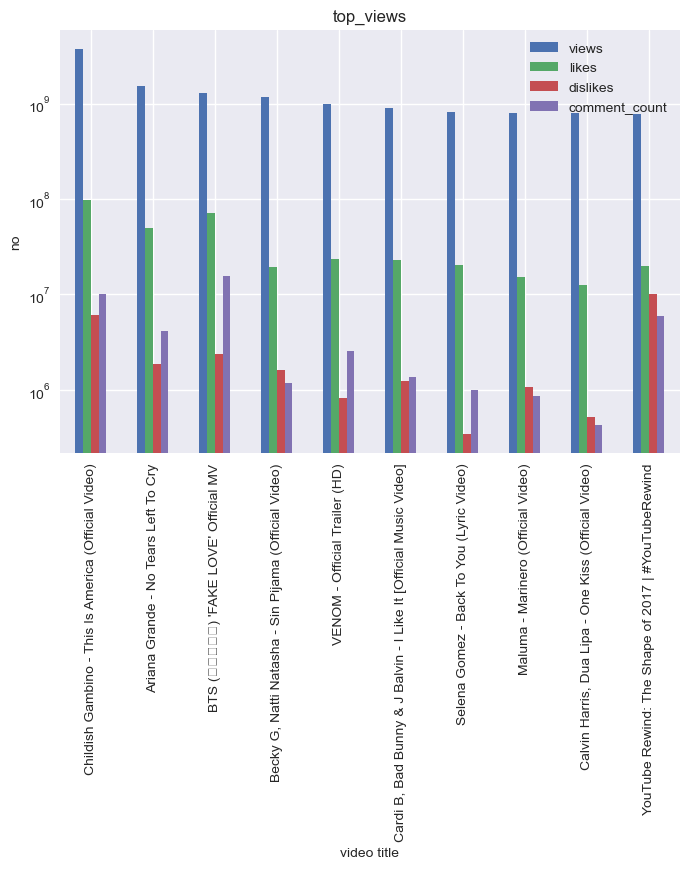

In [57]:
top.plot(kind="bar")
plt.yscale("log")
plt.xlabel("video title")
plt.ylabel("no")
plt.title("top_views")
plt.show()

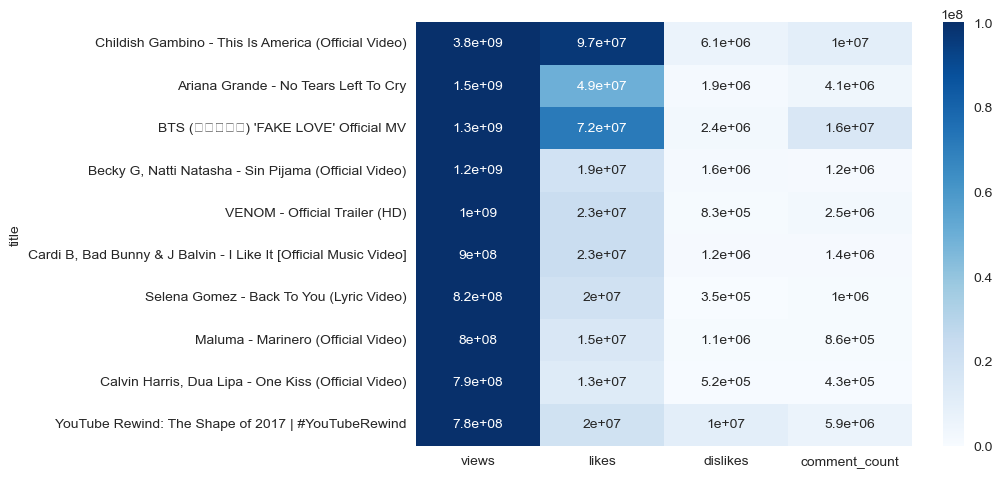

In [58]:
sns.heatmap(data=top,cmap="Blues",annot=True,vmin=0,
    vmax=100000000)
plt.show()

In [59]:
top_views=df.groupby(["title"])["views"].sum().nlargest(10)
top_views

title
Childish Gambino - This Is America (Official Video)                 3758488765
Ariana Grande - No Tears Left To Cry                                1529291326
BTS (방탄소년단) 'FAKE LOVE' Official MV                                 1283188291
Becky G, Natti Natasha - Sin Pijama (Official Video)                1182971286
VENOM - Official Trailer (HD)                                       1003151226
Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]     896558471
Selena Gomez - Back To You (Lyric Video)                             818792483
Maluma - Marinero (Official Video)                                   803455479
Calvin Harris, Dua Lipa - One Kiss (Official Video)                  792843004
YouTube Rewind: The Shape of 2017 | #YouTubeRewind                   780801040
Name: views, dtype: int64

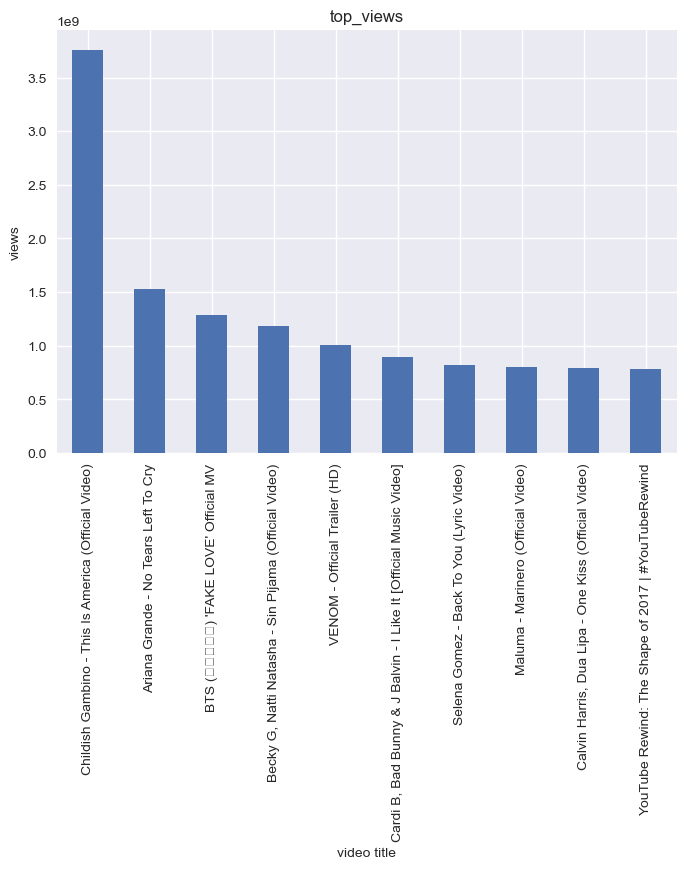

In [60]:
top_views.plot(kind="bar")
plt.xlabel("video title")
plt.ylabel("views")
plt.title("top_views")
plt.show()

In [61]:
top_likes=df.groupby(["title"])[["views","likes","dislikes","comment_count"]].sum().nlargest(10,"likes")
top_likes

,views,likes,dislikes,comment_count
title,,,,
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
Ariana Grande - No Tears Left To Cry,1529291326,49451353,1877988,4143608
Taylor Swift - Delicate,728576946,24868764,1413970,2210876
VENOM - Official Trailer (HD),1003151226,23339807,831784,2533352
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",896558471,23078293,1233979,1370188
BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ver.),138056591,22622742,135878,1979067
BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF 起 Wonder',165689328,22470914,174332,2415111
BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer,195355414,22189964,213286,3114441


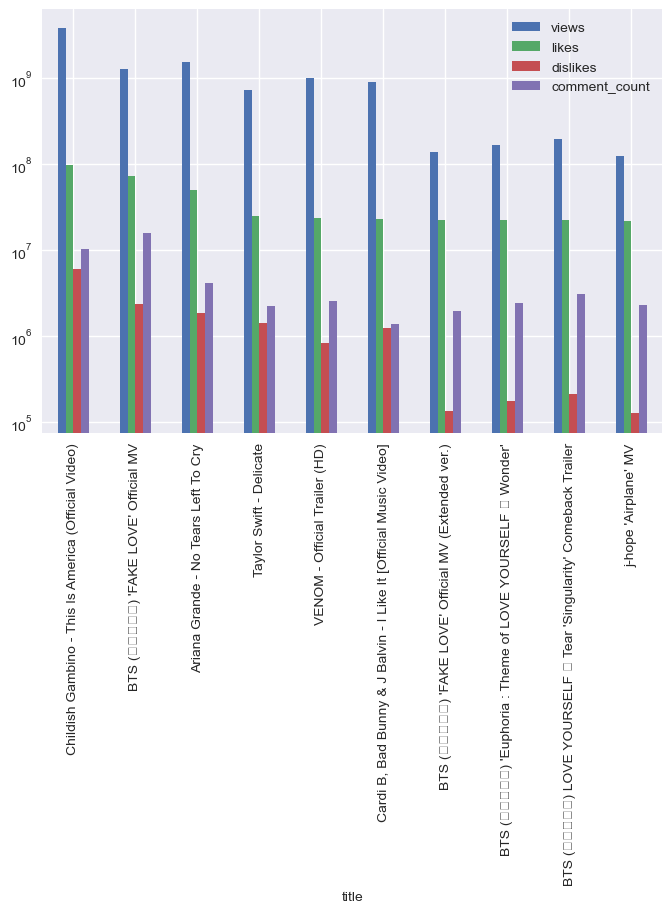

In [62]:
top_likes.plot(kind="bar")
plt.yscale("log")
plt.show()

In [63]:
top_views.index==top_likes.index

array([ True, False, False, False,  True,  True, False, False, False,
       False])

In [64]:
top_dislikes=df.groupby(["title"])[["views","likes","dislikes","comment_count"]].sum().nlargest(10,"dislikes")
top_dislikes

,views,likes,dislikes,comment_count
title,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,780801040,19781372,10111153,5898529
So Sorry.,204298706,8495733,9192539,8190045
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,243774929,8844405,5240006,3590220
Suicide: Be Here Tomorrow.,157627870,14271026,3239399,4710338
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
Ariana Grande - No Tears Left To Cry,1529291326,49451353,1877988,4143608
Katy Perry - Hey Hey Hey (Official),267531344,8404683,1658814,867905
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286,19185287,1616616,1176862


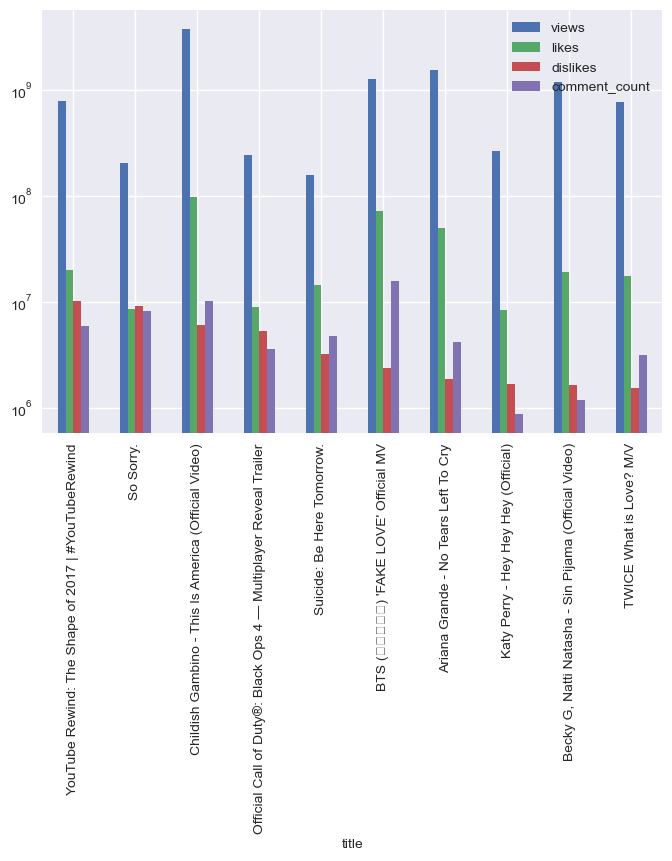

In [65]:
top_dislikes.plot(kind="bar")
plt.yscale("log")
plt.show()

In [66]:
top_com=df.groupby(["title"])[["views","likes","dislikes","comment_count"]].sum().nlargest(10,"comment_count")
top_com

,views,likes,dislikes,comment_count
title,,,,
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
So Sorry.,204298706,8495733,9192539,8190045
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,780801040,19781372,10111153,5898529
Suicide: Be Here Tomorrow.,157627870,14271026,3239399,4710338
Ariana Grande - No Tears Left To Cry,1529291326,49451353,1877988,4143608
Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,243774929,8844405,5240006,3590220
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,188052671,17388770,273225,3509630
TWICE What is Love? M/V,774320575,17322894,1534546,3172060


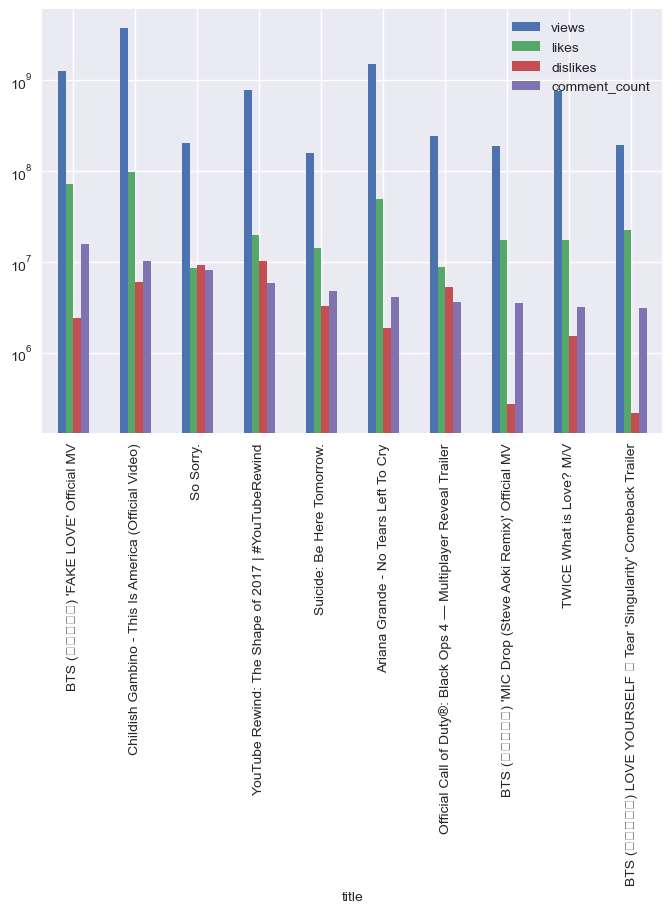

In [67]:
top_com.plot(kind="bar")
plt.yscale("log")
plt.show()

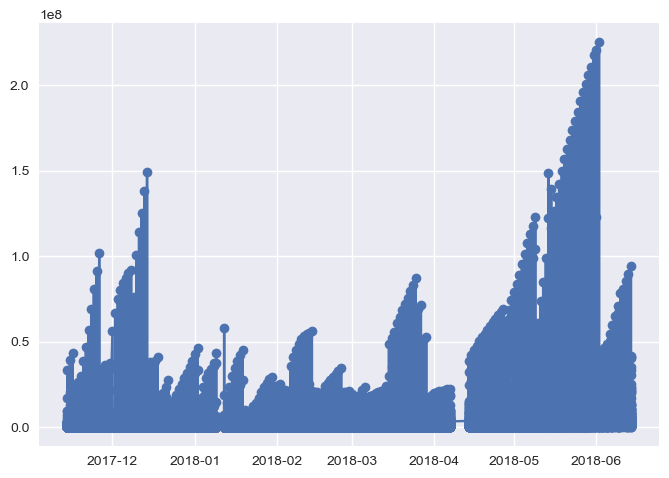

In [68]:
plt.plot(df["trending_date"],df["views"],marker="o")
# plt.yscale("log")
plt.show()

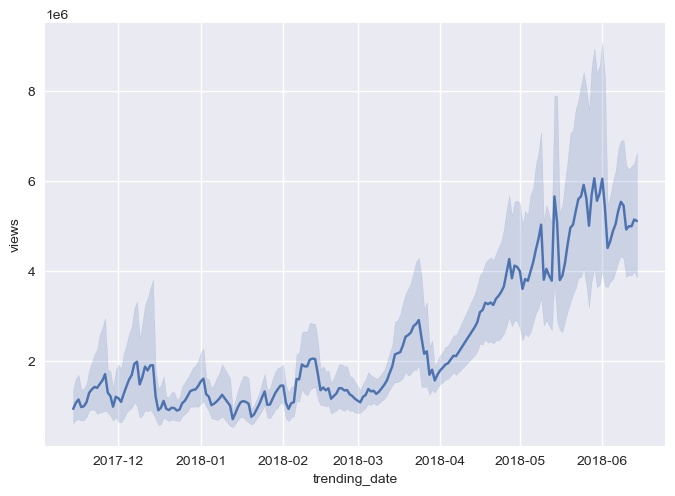

In [69]:
sns.lineplot(x=df["trending_date"],y=df["views"])
# plt.yscale("log")
plt.show()

In [70]:
filt=df["title"]=="Childish Gambino - This Is America (Official Video)"
z=df[filt]
z

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%
33351,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,2 days,Sunday,4.60
33557,VYOjWnS4cMY,2018-05-09,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841540,79717,194822,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,3 days,Sunday,4.07
33772,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377,232723,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,4 days,Sunday,3.76
33983,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478904,124290,263984,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,5 days,Sunday,3.55
34202,VYOjWnS4cMY,2018-05-12,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,289682,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,6 days,Sunday,3.38
34420,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,7 days,Sunday,3.23
34850,VYOjWnS4cMY,2018-05-15,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",116581406,3388289,186591,354187,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,9 days,Sunday,3.07
35057,VYOjWnS4cMY,2018-05-16,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,10 days,Sunday,3.01
35265,VYOjWnS4cMY,2018-05-17,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,11 days,Sunday,2.95
35474,VYOjWnS4cMY,2018-05-18,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,04:00:07,2018-05-06,12 days,Sunday,2.90


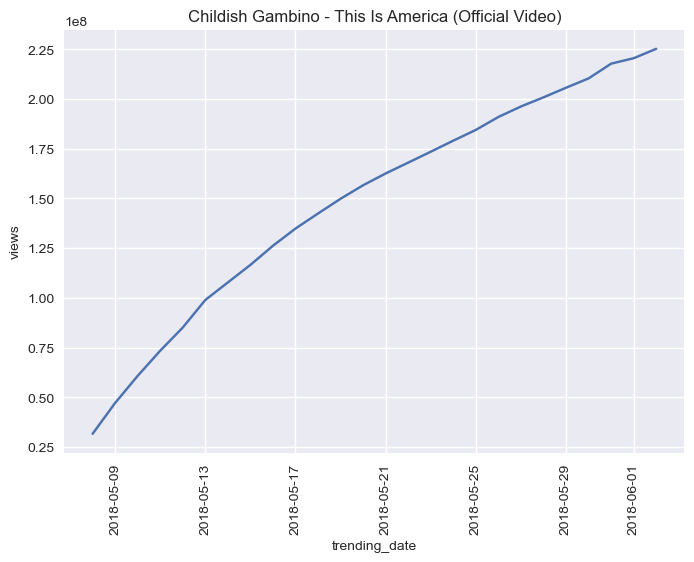

In [71]:
plt.plot(z["trending_date"],z["views"])
plt.xticks(rotation=90)
plt.xlabel("trending_date")
plt.ylabel("views")
plt.title("Childish Gambino - This Is America (Official Video)")
plt.show()

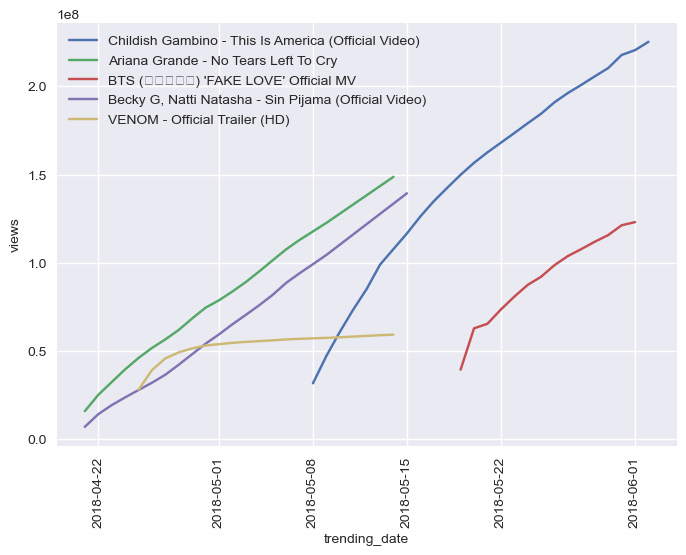

In [72]:
for i in top.index[0:5]:
    x=df[df["title"]==i]
    plt.plot(x["trending_date"],x["views"],label=i)
plt.legend()
plt.xlabel("trending_date")
plt.ylabel("views")
plt.xticks(rotation=90)
plt.show()    

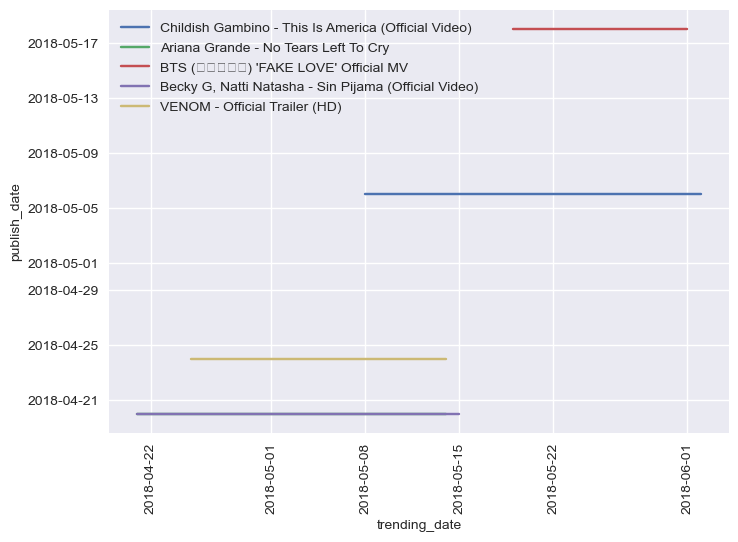

In [73]:
for i in top.index[0:5]:
    x=df[df["title"]==i]
    plt.plot(x["trending_date"],x["publish_date"],label=i)
plt.legend()
plt.xlabel("trending_date")
plt.ylabel("publish_date")
plt.xticks(rotation=90)
plt.show()

# top videos

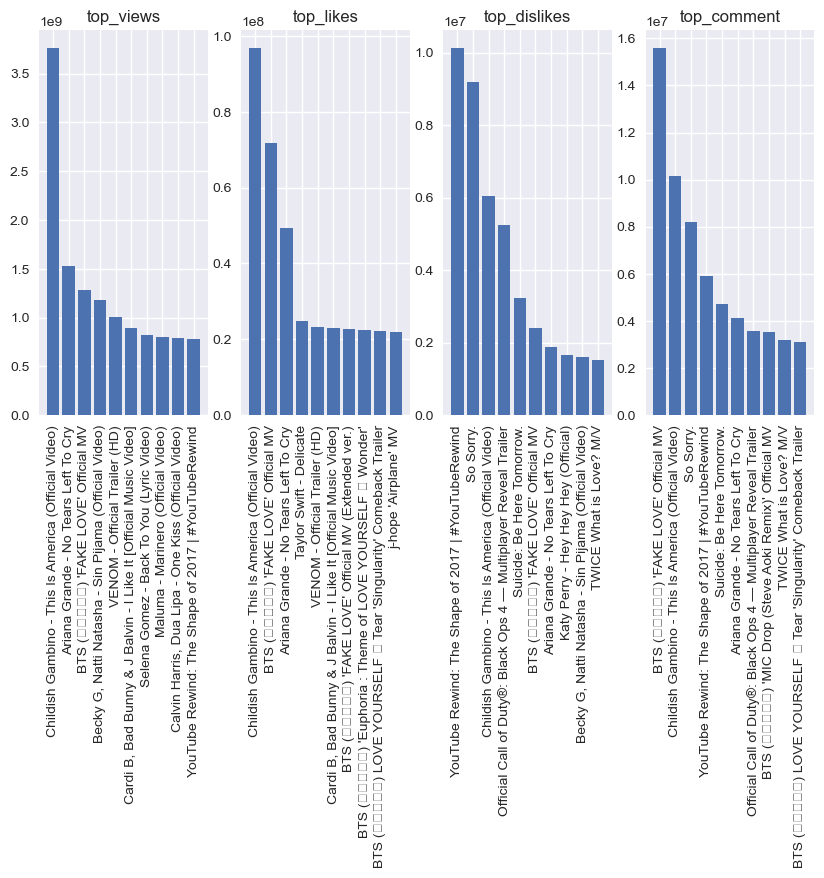

In [74]:
fig,ax=plt.subplots(1,4,figsize=(10,5))

ax[0].bar(top_views.index,top_views)
ax[0].set_title("top_views")
ax[0].set_xticklabels(top_views.index, rotation=90)

ax[1].bar(top_likes.index,top_likes["likes"])
ax[1].set_title("top_likes")
ax[1].set_xticklabels(top_likes.index, rotation=90)

ax[2].bar(top_dislikes.index,top_dislikes["dislikes"])
ax[2].set_title("top_dislikes")
ax[2].set_xticklabels(top_dislikes.index, rotation=90)

ax[3].bar(top_com.index,top_com["comment_count"])
ax[3].set_title("top_comment")
ax[3].set_xticklabels(top_com.index, rotation=90)

plt.show()


# react%

In [75]:
ss=df.sort_values(by="react%",ascending=False).head(10)
ss

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%
10200,LsoLEjrDogU,2018-01-04,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,10,"Bruno Mars|""Finesse""|""Cardi B""|""Finesse Remix""...",548621,159356,2374,19455,https://i.ytimg.com/vi/LsoLEjrDogU/default.jpg,False,False,False,Finesse (Remix) Feat. Cardi B Available Now: h...,Music,04:49:43,2018-01-04,0 days,Thursday,29.48
608,TyHvyGVs42U,2017-11-17,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",499946,135292,3528,12094,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,"Music video by Luis Fonsi, Demi Lovato perform...",Music,05:00:01,2017-11-17,0 days,Friday,27.77
22174,8O_MwlZ2dEg,2018-03-07,j-hope 'Airplane' MV,ibighit,10,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",5275672,1401915,6268,158127,https://i.ytimg.com/vi/8O_MwlZ2dEg/default.jpg,False,False,False,j-hope 'Airplane' MV\n\n\n\nj-hope - 'Hope Wor...,Music,15:00:10,2018-03-06,1 days,Tuesday,26.69
14428,9vDdx1dba6c,2018-01-27,dodie - Secret For The Mad,dodieVEVO,10,"dodie|""Secret""|""For""|""The""|""Mad""|""Ditto""|""Musi...",129130,32755,98,2964,https://i.ytimg.com/vi/9vDdx1dba6c/default.jpg,False,False,False,Directed and animated by \nHannah Jacobs - htt...,Music,18:00:15,2018-01-26,1 days,Friday,25.44
5025,inZzcTXYowY,2017-12-09,Louis Tomlinson - Miss You (Official Video),LouisTomlinsonVEVO,10,"Louis Tomlinson|""Miss You""|""Pop""|""Syco Music""",985998,241679,793,26259,https://i.ytimg.com/vi/inZzcTXYowY/default.jpg,False,False,False,Louis Tomlinson's new single ‘Miss You’ is out...,Music,16:00:04,2017-12-08,1 days,Friday,24.59
38352,D_6QmL6rExk,2018-06-02,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,ibighit,10,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""fak...",5884233,1437859,6390,134721,https://i.ytimg.com/vi/D_6QmL6rExk/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Music,15:00:01,2018-06-01,1 days,Friday,24.54
19780,UaAHl_m_ybk,2018-02-23,5 Seconds Of Summer - Want You Back (Audio),5SOSVEVO,10,"Seconds|""Of""|""Summer""|""Want""|""You""|""Back""|""Cap...",439056,106536,656,20575,https://i.ytimg.com/vi/UaAHl_m_ybk/default.jpg,False,False,False,Music video by 5 Seconds Of Summer performing ...,Music,00:00:01,2018-02-23,0 days,Friday,24.41
33789,6mkLWGy6Y3k,2018-05-10,Shawn Mendes: The Tour - Official Trailer,Shawn Mendes,10,[none],332910,80118,232,5420,https://i.ytimg.com/vi/6mkLWGy6Y3k/default.jpg,False,False,False,For tickets & tour info head to: http://www.sh...,Music,17:23:08,2018-05-08,2 days,Tuesday,24.14
34000,6mkLWGy6Y3k,2018-05-11,Shawn Mendes: The Tour - Official Trailer,Shawn Mendes,10,[none],355703,82016,249,5459,https://i.ytimg.com/vi/6mkLWGy6Y3k/default.jpg,False,False,False,For tickets & tour info head to: http://www.sh...,Music,17:23:08,2018-05-08,3 days,Tuesday,23.13
5253,a9B4AgwYG4E,2017-12-10,Idol EXPOSES Dark Side of KPOP | STORYTIME exp...,Henry Prince Mak,22,"kpop|""kpop idols""|""kpop idol""|""jjcc""|""prince m...",35704,8147,43,560,https://i.ytimg.com/vi/a9B4AgwYG4E/default.jpg,False,False,False,Video on WHY I LEFT KPOP https://youtu.be/QRm1...,People & Blogs,16:28:01,2017-12-09,1 days,Saturday,22.94


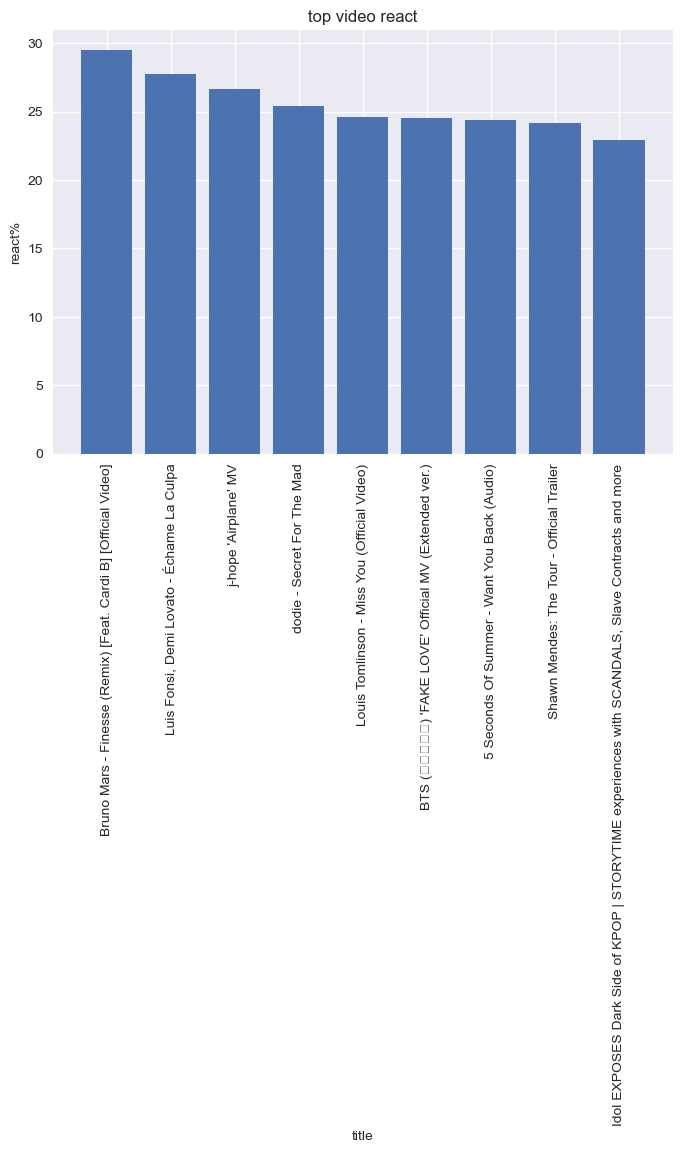

In [76]:
plt.bar(ss["title"],ss["react%"])
plt.xticks(rotation=90)
plt.xlabel("title")
plt.ylabel("react%")
plt.title("top video react")
plt.show()

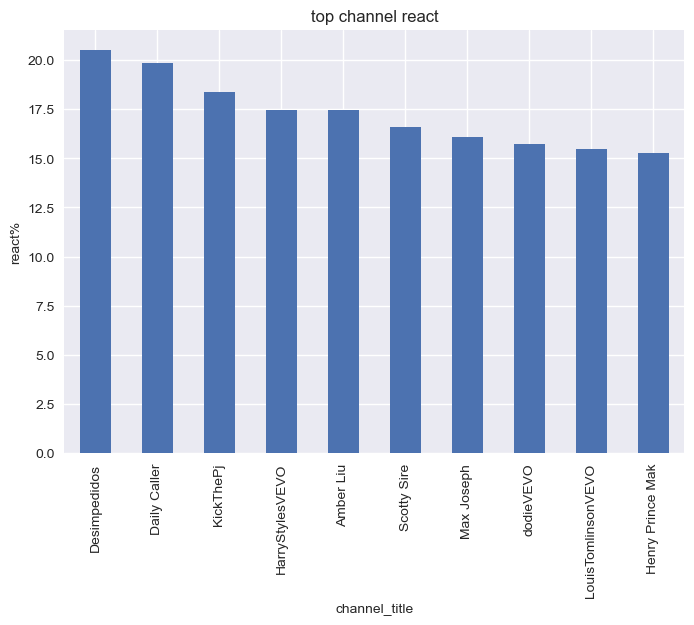

In [77]:
df.groupby(["channel_title"]).mean()["react%"].nlargest(10).plot(kind="bar")
plt.xticks(rotation=90)

plt.ylabel("react%")
plt.title("top channel react")
plt.show()

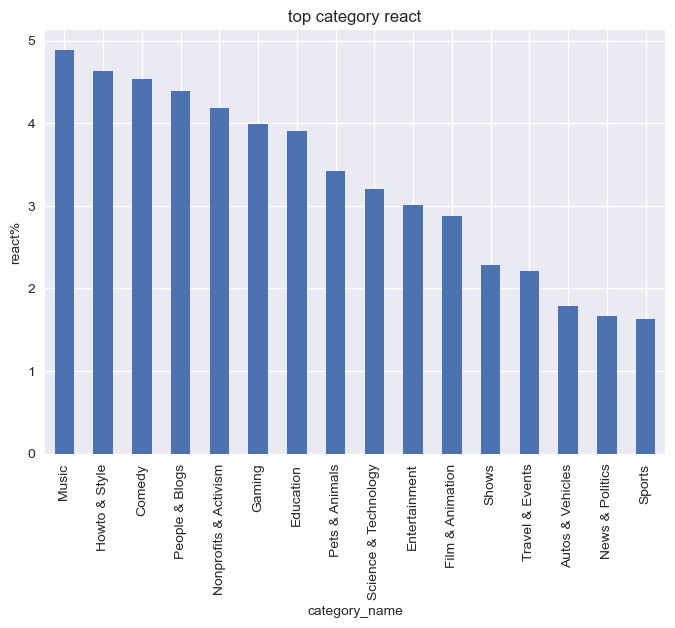

In [78]:
df.groupby(["category_name"]).mean()["react%"].nlargest(20).plot(kind="bar")
plt.xticks(rotation=90)

plt.ylabel("react%")
plt.title("top category react")
plt.show()

# Views vs Likes

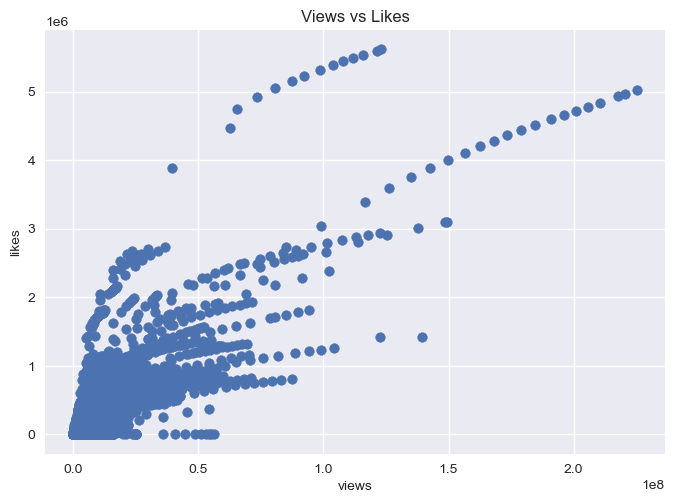

In [79]:
plt.scatter(df["views"],df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.title("Views vs Likes")
plt.show()

In [80]:
ll=df.groupby(["title"])[["views","likes","comment_count","dislikes"]].sum().sort_values(by="views")#.head(50)
ll

,views,likes,comment_count,dislikes
title,,,,
"Raw: 3 South Carolina Deputies, 1 Officer Shot",748,9,0,0
Huffy Metaloid Bicycle Commercial 1997,773,2,0,0
The Algorithm That Will Keep You Buying On Cyber Monday | Mach | NBC News,1381,35,4,6
Coach Taggart Monday Presser Ahead of Arizona,1391,20,10,4
How Noah Galvin Makes Evan Hansen His Own,1402,20,0,0
...,...,...,...,...
VENOM - Official Trailer (HD),1003151226,23339807,2533352,831784
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286,19185287,1176862,1616616
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,15568561,2389776


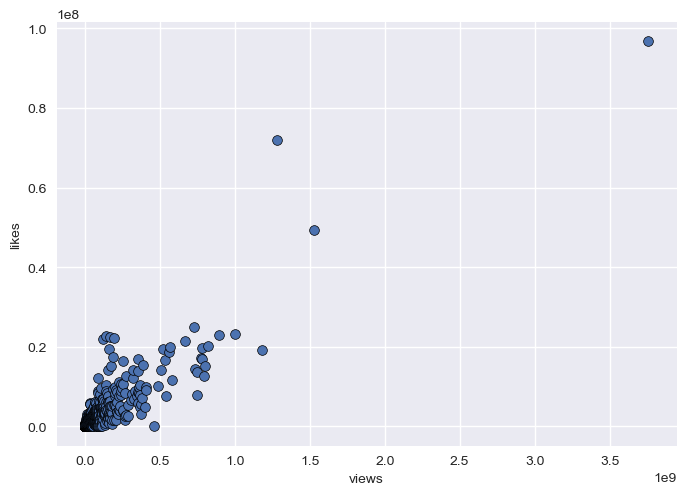

In [81]:
plt.scatter(ll["views"],ll["likes"],linewidths=0.5,edgecolors="#000000")
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("views")
plt.ylabel("likes")

plt.show()

In [82]:
# sns.lineplot(x=df["views"],y=df["likes"])
# plt.xlabel("views")
# plt.ylabel("likes")
# plt.show()

# 0 day to trend

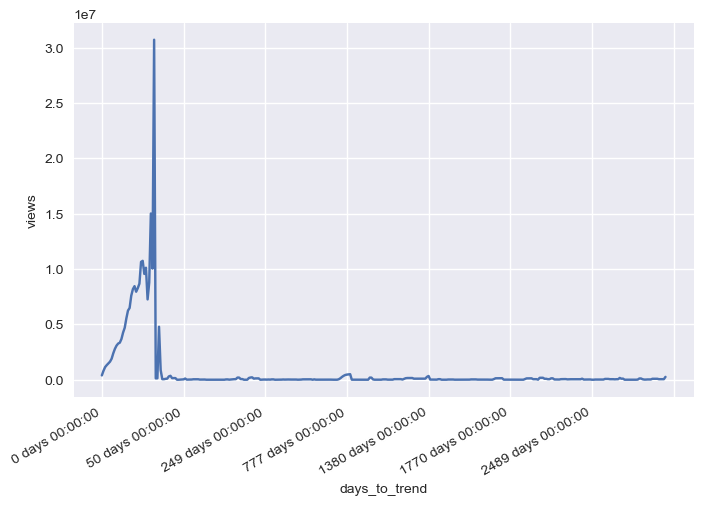

In [83]:
df.groupby(["days_to_trend"]).mean()["views"].plot()
plt.xlabel("days_to_trend")
plt.ylabel("views")
plt.show()

In [84]:
aa=df[df["days_to_trend"]=='0 days']
aa

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%
215,xL_qpDkF5A8,2017-11-15,American Crime Story Season 2: The Assassinati...,TV Promos,24,"Donatella Versace|""Antonio D' Amico""|""Penelope...",14565,478,13,67,https://i.ytimg.com/vi/xL_qpDkF5A8/default.jpg,False,False,False,The Assassination of Gianni Versace: American ...,Entertainment,01:25:18,2017-11-15,0 days,Wednesday,3.37
216,eQVhAN7-IAw,2017-11-15,The Making of a Song: “Delicate” – watch more ...,Taylor Swift,10,"DIRECTV|""DIRECTVNOW""|""ATT""|""AT&T""|""The Making ...",125645,16754,65,1373,https://i.ytimg.com/vi/eQVhAN7-IAw/default.jpg,False,False,False,A glimpse into Taylor’s songwriting process as...,Music,03:43:47,2017-11-15,0 days,Wednesday,13.39
241,vZzIS17HexE,2017-11-15,Taylor Swift Instagram Story - Target 11/14/17,reputationswift,24,"Taylor swift Instagram Story|""Target""|""Taylors...",3006,75,4,10,https://i.ytimg.com/vi/vZzIS17HexE/default.jpg,False,False,False,BUYING HER OWN ALBUM IN TARGET,Entertainment,03:11:17,2017-11-15,0 days,Wednesday,2.63
608,TyHvyGVs42U,2017-11-17,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",499946,135292,3528,12094,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,"Music video by Luis Fonsi, Demi Lovato perform...",Music,05:00:01,2017-11-17,0 days,Friday,27.77
632,U5sCjnezw4o,2017-11-17,Jaylen Brown delivers emotional press conferen...,MassLive,25,"auth-jking413-auth|""Jay-King""",5938,108,3,21,https://i.ytimg.com/vi/U5sCjnezw4o/default.jpg,False,False,False,NaN,News & Politics,04:20:40,2017-11-17,0 days,Friday,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37949,aJOTlE1K90k,2018-05-31,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,10,"Maroon|""Girls""|""Like""|""You""|""Interscope""|""Reco...",3057987,406604,4520,31301,https://i.ytimg.com/vi/aJOTlE1K90k/default.jpg,False,False,False,Girls Like You” is out now.http://smarturl.it/...,Music,04:00:00,2018-05-31,0 days,Thursday,13.44
39151,qFy5XyZsUeo,2018-06-06,Michael Ketterer: Father Of 6 Scores Golden Bu...,America's Got Talent,24,"America's Got Talent 2018|""america's got talen...",883608,25677,492,2487,https://i.ytimg.com/vi/qFy5XyZsUeo/default.jpg,False,False,False,The pediatric mental health nurse from East Te...,Entertainment,01:58:03,2018-06-06,0 days,Wednesday,2.96
40349,PPWDwBrUNyY,2018-06-12,"YouTube Live at E3 2018: Monday with Ninja, Ma...",gameslice,20,"youtube live at E3|""geoff keighley""|""e3 live""|...",3483553,23725,3145,462,https://i.ytimg.com/vi/PPWDwBrUNyY/default.jpg,False,False,False,Join Geoff Keighley and YouTube for Live at E3...,Gaming,04:45:52,2018-06-12,0 days,Tuesday,0.77
40549,FchkqXEg0qs,2018-06-13,Nintendo @ E3 2018: Day 1,Nintendo,20,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",3238183,61841,3708,0,https://i.ytimg.com/vi/FchkqXEg0qs/default.jpg,True,False,False,ESRB Rating: RATING PENDING to Teen. Rating Pe...,Gaming,01:18:57,2018-06-13,0 days,Wednesday,2.02


In [85]:
aa.shape

(121, 21)

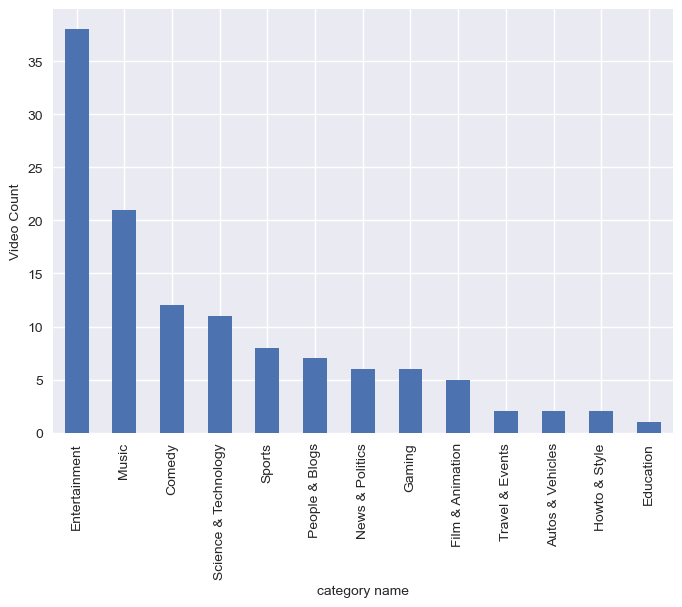

In [86]:
aa["category_name"].value_counts().plot(kind="bar")
plt.xlabel("category name")
plt.ylabel("Video Count")
plt.show()

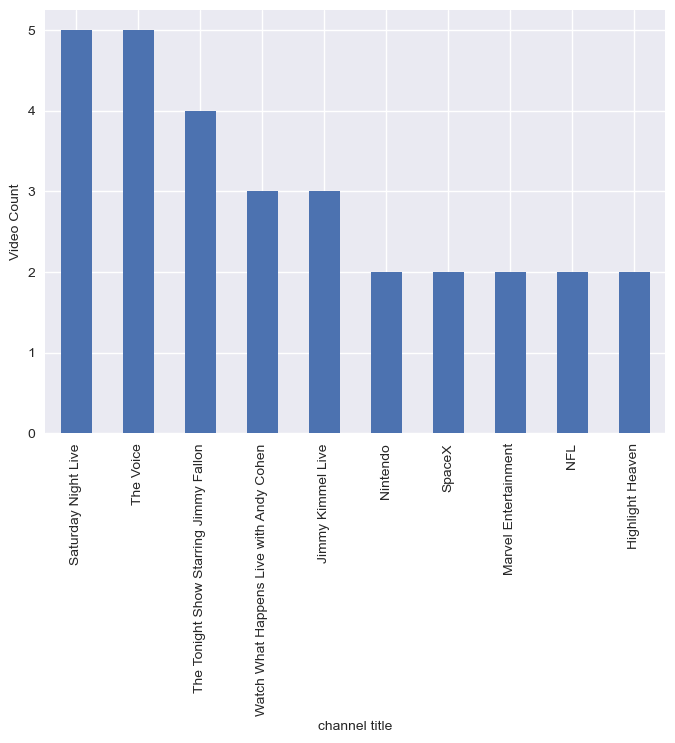

In [87]:
aa["channel_title"].value_counts().nlargest(10).plot(kind="bar")
plt.xlabel("channel title")
plt.ylabel("Video Count")
plt.show()

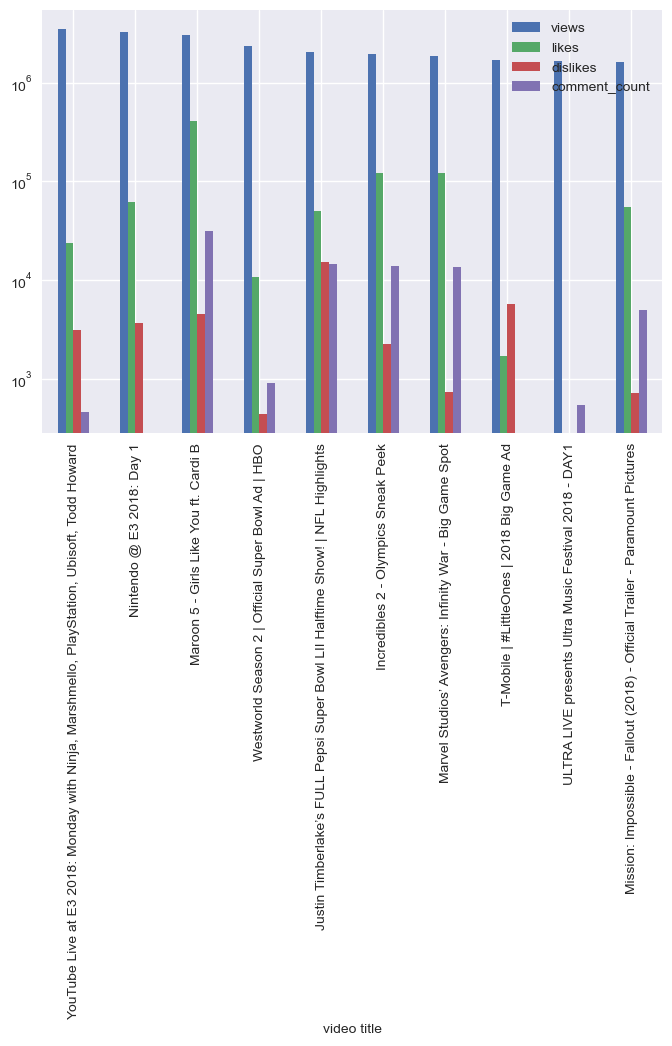

In [88]:
aa.groupby(["title"]).sum()[["views","likes","dislikes","comment_count"]].nlargest(10,"views").plot(kind="bar")
plt.yscale("log")
plt.xlabel("video title")

#plt.title("top_views")
plt.show()

# Time

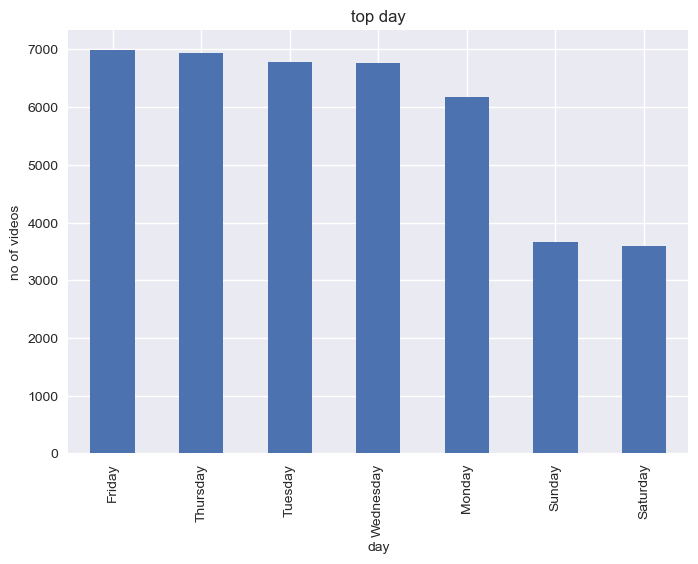

In [89]:
df.groupby(["day"])["trending_date"].count().nlargest(7).plot(kind="bar")
plt.xlabel("day")
plt.ylabel("no of videos")
plt.title("top day")
plt.show()

In [90]:
df["hour"] = df["publish_hour"].apply(lambda x: x.hour)
df.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%,hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13,1 days,Monday,8.08,17


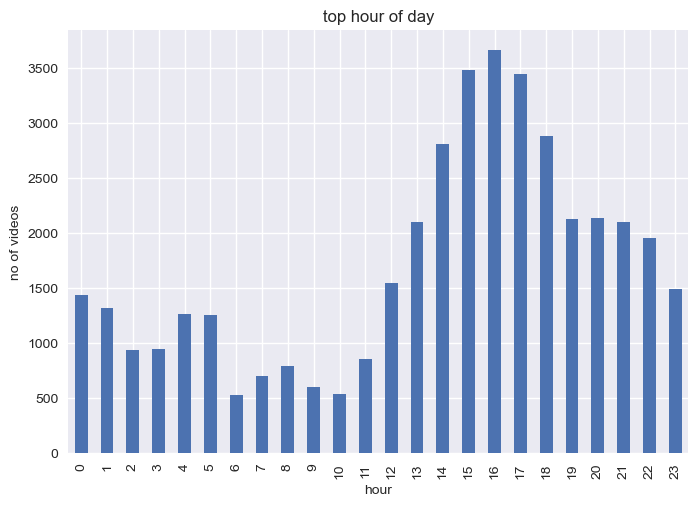

In [91]:
df.groupby(["hour"])["trending_date"].count().plot(kind="bar")
plt.xlabel("hour")
plt.ylabel("no of videos")
plt.title("top hour of day")
plt.show()

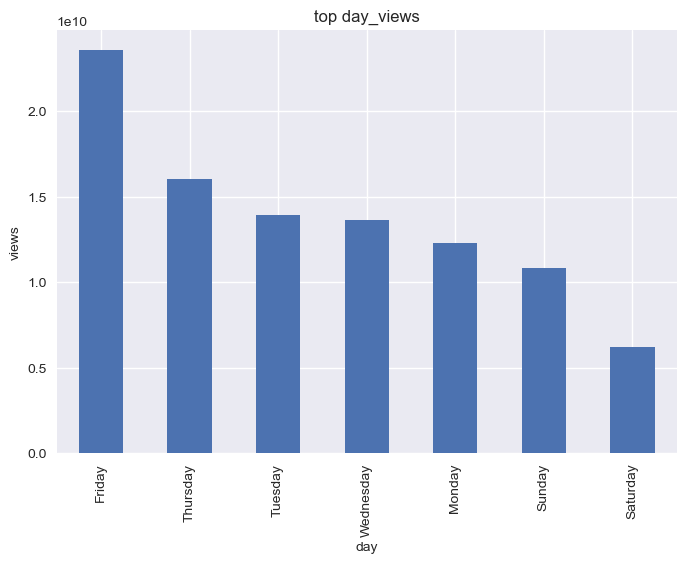

In [92]:
df.groupby(["day"])["views"].sum().nlargest(7).plot(kind="bar")
plt.xlabel("day")
plt.ylabel("views")
plt.title("top day_views")
plt.show()

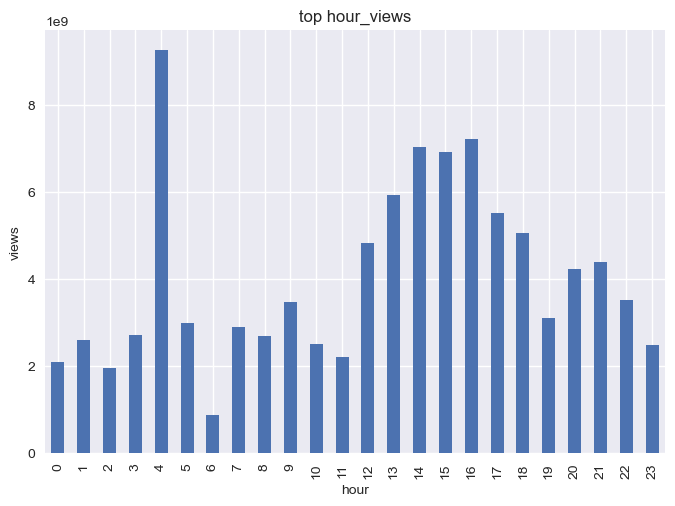

In [93]:
df.groupby(["hour"])["views"].sum().plot(kind="bar")
plt.xlabel("hour")
plt.ylabel("views")
plt.title("top hour_views")
plt.show()

# hist

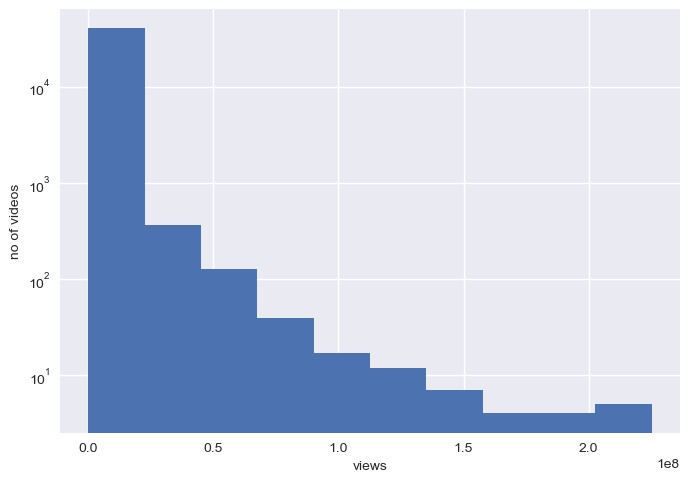

In [94]:
df["views"].plot(kind="hist")
plt.yscale("log")
plt.xlabel("views")
plt.ylabel("no of videos")
plt.show()

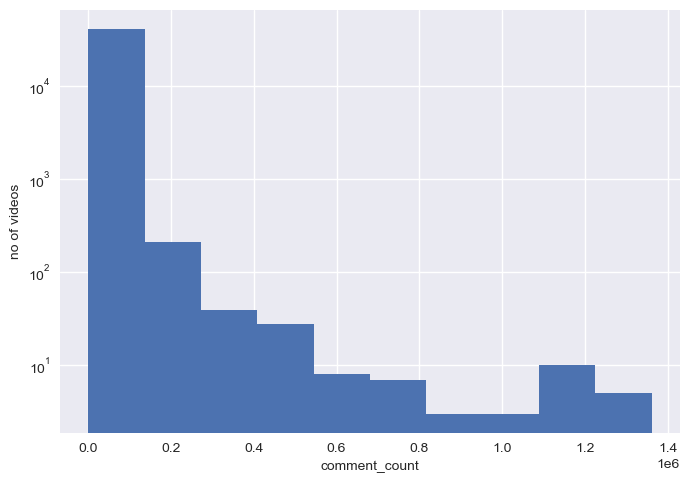

In [95]:
df["comment_count"].plot(kind="hist")
plt.yscale("log")
plt.xlabel("comment_count")
plt.ylabel("no of videos")
plt.show()

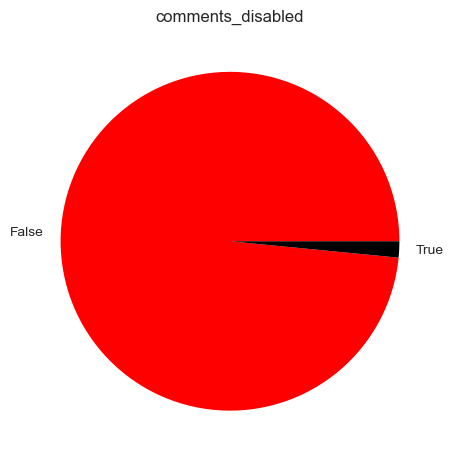

In [116]:
df["comments_disabled"].value_counts().plot(kind="pie",colors=(["r","k"]))
plt.title("comments_disabled")
plt.ylabel("")
plt.show()

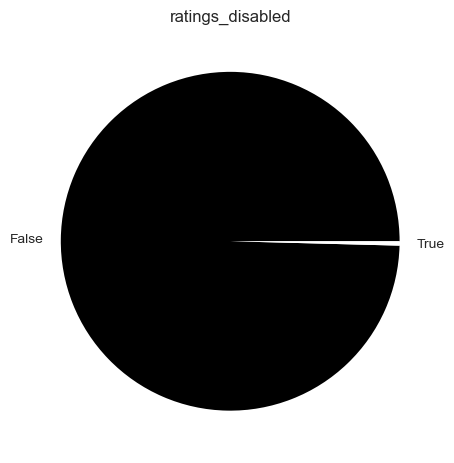

In [97]:
df["ratings_disabled"].value_counts(normalize=True).plot(kind="pie",colors=(["k","w"]))
plt.title("ratings_disabled")
plt.ylabel("")
plt.show()

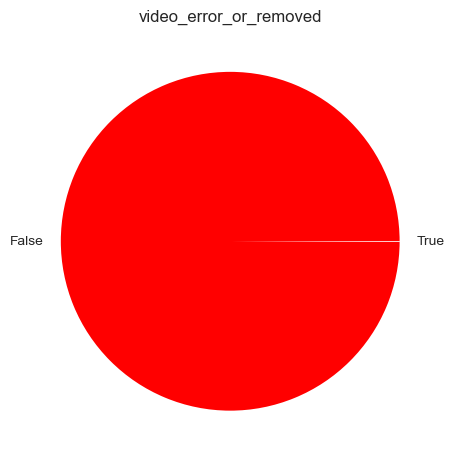

In [98]:
df["video_error_or_removed"].value_counts(normalize=True).plot(kind="pie",colors=(["r","w"]))
plt.title("video_error_or_removed")
plt.ylabel("")
plt.show()

In [100]:
df["likes > dislikes"] = df.apply(lambda x: 1 if x["likes"] >= x["dislikes"] else 0, axis=1)

In [101]:
df["likes > dislikes"].value_counts()

1    40325
0      576
Name: likes > dislikes, dtype: int64

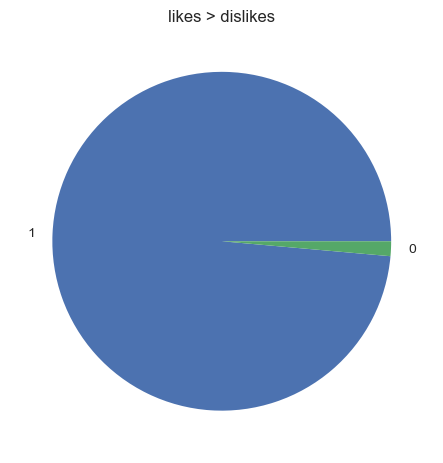

In [102]:

df["likes > dislikes"].value_counts().plot(kind="pie")
plt.title("likes > dislikes")
plt.ylabel("")
plt.show()

# Title & Tag str

In [103]:
# x={}
# for i in df["title"].str.split():
#     if i in x.keys():
#         x[i]+=1
#     else:
#         x[i]=1
# print(x)        

In [104]:
x = {}
for title in df["title"]:
    words = title.split()
    for word in words:
        if word in x.keys():
            x[word] += 1
        else:
            x[word] = 1

#print(x)
for b,n in x.items():
     if n>1000:
        print(f"\"{b}\"---------{n}")


"The"---------5757
"with"---------1654
"|"---------10649
"&"---------2020
"I"---------1937
"-"---------11440
"to"---------2341
"the"---------3607
"Official"---------1553
"Trailer"---------1867
"of"---------2335
"(Official"---------1592
"Video)"---------1900
"To"---------1395
"a"---------2563
"How"---------1660
"You"---------1251
"A"---------2119
"and"---------1915
"ft."---------1016
"on"---------1550
"in"---------2171
"for"---------1019
"My"---------1079
"2018"---------1610


In [105]:
from collections import Counter

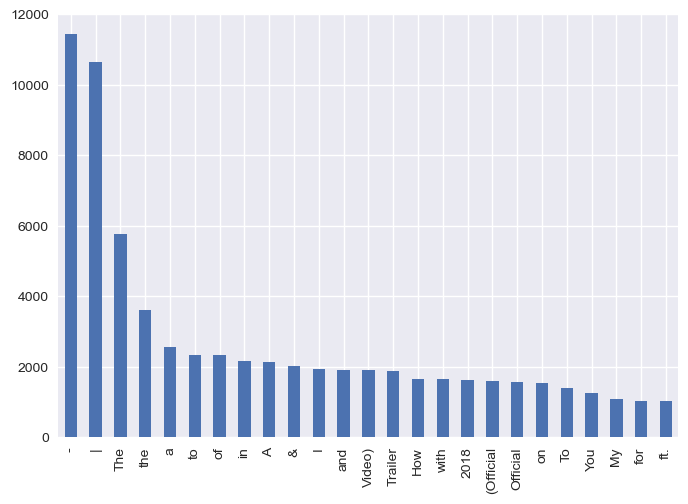

In [106]:
x = {}
for title in df["title"]:
    words = title.split()
    for word in words:
        if word in x:
            x[word] += 1
        else:
            x[word] = 1

# title_words = list(df["title"].apply(lambda x: x.split()))
# title_words = [x for y in title_words for x in y]
z=Counter(x).most_common(25)
z=dict(z)
zf=pd.Series(z)
zf.plot(kind="bar")
plt.show()

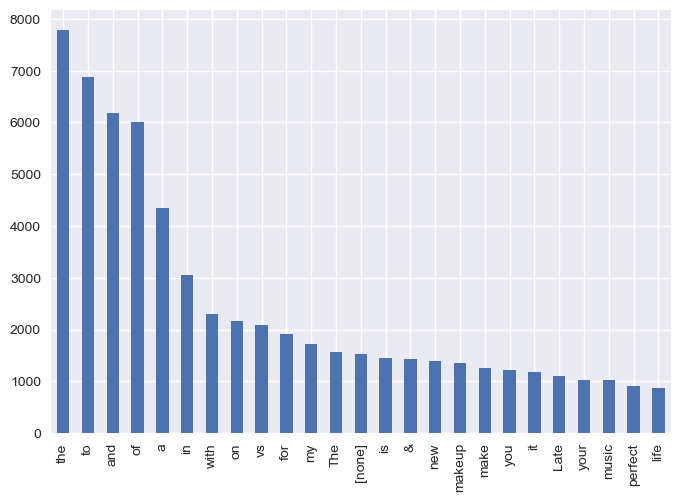

In [107]:
y = {}
for title in df["tags"]:
    words = title.split()
    for word in words:
        if word in y:
            y[word] += 1
        else:
            y[word] = 1

# title_words = list(df["title"].apply(lambda x: x.split()))
# title_words = [x for y in title_words for x in y]
zz=Counter(y).most_common(25)
zz=dict(zz)
zzf=pd.Series(zz)
zzf.plot(kind="bar")
plt.show()

In [108]:
df[df["tags"].str.contains(" a ")].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%,hour,likes > dislikes
16,ZAQs-ctOqXQ,2017-11-14,One Change That Would Make Pacific Rim a Classic,Cracked,23,"pacific rim|""pacific rim 2""|""pacific rim seque...",295639,8011,638,1256,https://i.ytimg.com/vi/ZAQs-ctOqXQ/default.jpg,False,False,False,"Pacific Rim was so good, we can’t believe they...",Comedy,17:00:05,2017-11-12,2 days,Sunday,2.93,17,1
23,JBZTZZAcFTw,2017-11-14,"What $4,800 Will Get You In NYC | Sweet Digs H...",Refinery29,26,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,1707,578,673,https://i.ytimg.com/vi/JBZTZZAcFTw/default.jpg,False,False,False,"On this episode of Sweet Digs, we tour Social ...",Howto & Style,16:00:01,2017-11-12,2 days,Sunday,1.57,16,1


In [109]:
x = {}
for title in df["title"]:
    words = title.split()
    for word in words:
        if word in x:
            x[word] += 1
        else:
            x[word] = 1

# Sort the dictionary items by their values in descending order
sorted_x = sorted(x.items(), key=lambda item: item[1], reverse=True)

# Print words with frequencies greater than 1000
for word, count in sorted_x:
    if count > 1000:
        print(f'"{word}"---------{count}')


"-"---------11440
"|"---------10649
"The"---------5757
"the"---------3607
"a"---------2563
"to"---------2341
"of"---------2335
"in"---------2171
"A"---------2119
"&"---------2020
"I"---------1937
"and"---------1915
"Video)"---------1900
"Trailer"---------1867
"How"---------1660
"with"---------1654
"2018"---------1610
"(Official"---------1592
"Official"---------1553
"on"---------1550
"To"---------1395
"You"---------1251
"My"---------1079
"for"---------1019
"ft."---------1016


In [110]:
df["len_title"]=df["title"].apply(len)
df.head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_hour,publish_date,days_to_trend,day,react%,hour,likes > dislikes,len_title
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,17:13:01,2017-11-13,1 days,Monday,8.08,17,1,34
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,07:30:00,2017-11-13,1 days,Monday,4.27,7,1,62


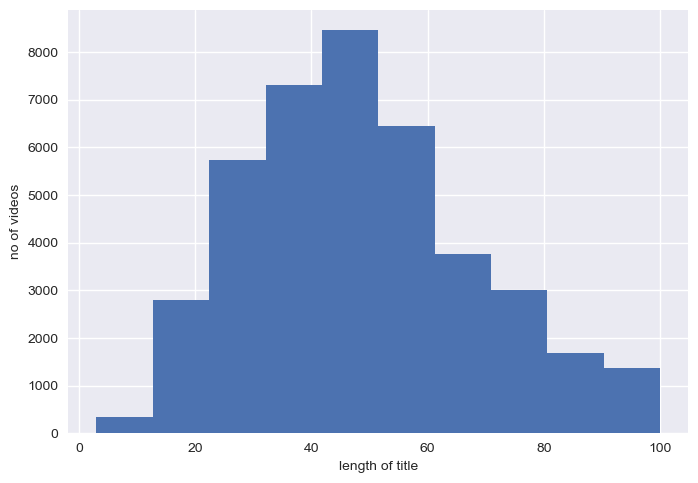

In [111]:
df["len_title"].plot(kind="hist")
plt.xlabel("length of title")
plt.ylabel("no of videos")
plt.show()

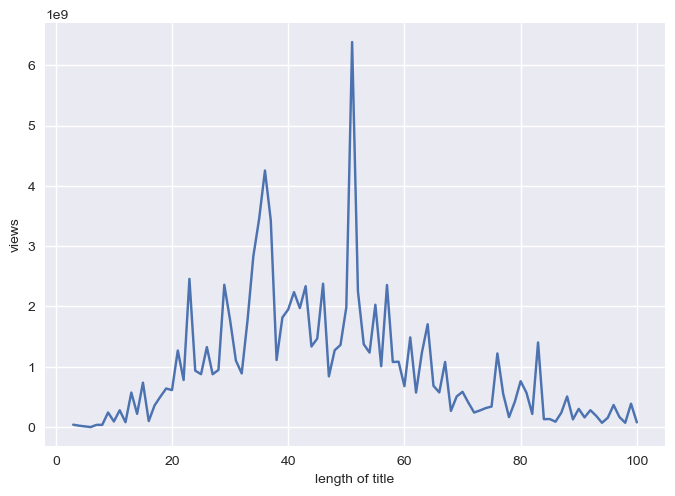

In [112]:
df.groupby(["len_title"]).sum()["views"].plot()
plt.xlabel("length of title")
plt.ylabel("views")
plt.show()

In [113]:
# import wordcloud
# wc = wordcloud.WordCloud(width=1200, height=500, 
#                          collocations=False, background_color="black", 
#                          colormap="tab20b").generate(" ".join(x))
# plt.figure(figsize=(15,10))
# plt.imshow(wc, interpolation='bilinear')
# _ = plt.axis("off")